## URL request and response

A URL is Uniform Resource Locator. It acts as a web address to different webpages. Every URL on the internet work on a request-response basis. The browser requests the server for a webpage and the response by the server would be the content of the webpage. This web content is then displayed on the browser.

URL Request - Requesting a web server for content to be viewed by the user. This HTTP request is triggered whenever you click on a link or open a webpage.

URL Response - A response for the request irrespective of success or failure. For every request to the web server, a mandatory response is provided by the web server and most of the times this would be the respective content requested by the user.

## Run a simple HTTP request and explain response headers, status codes

Instead of the browser requesting for the content of the webpage, Python can be used for the same. A HTTP request to the web server can be sent with the requests library and the response can be examined. Typically every request receives a response with response headers and status code details.

Let us request for the web content for the Monash University front webpage with the URL - https://www.monash.edu/. The requests library can be used to work with webpages and web content. A request is made to get the content of the webpage with the get() method.

In [2]:
import requests

monash_web_url = "https://www.monash.edu/"
response = requests.get(monash_web_url)

A response is received from the web server. This response will have response headers and status codes associated to that particular request.
Response headers give the detailed information about the request made to the web server.

In [3]:
response.headers

{'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Cache-Control': 'max-age=0, private', 'Pragma': 'cache', 'Server': 'openresty', 'X-Content-Type-Options': 'nosniff', 'X-Cache': 'HIT from squizedge.net', 'Date': 'Fri, 13 Mar 2020 02:14:03 GMT', 'Age': '8', 'Via': '1.1 squizedge.net', 'X-upgrade-enabled': 'off', 'X-Frame-Options': 'SAMEORIGIN', 'Expires': 'Fri, 13 Mar 2020 02:44:03 GMT', 'X-Request-ID': '64ce1751-983a-4590-aa60-1d3f6b933689', 'Content-Encoding': 'gzip'}

Every response will have a status code. The status codes indicate whether a specific HTTP request has been successfully completed.
Responses are grouped in five classes:

- Informational responses (100–199)
- Successful responses (200–299)
- Redirects (300–399)
- Client errors (400–499)
- Server errors (500–599)

Let us check the response status code for the HTTP request we placed

In [4]:
response.status_code

200

The response has a status code of 200. This is a successful response and hence there should be relevant content of the webpage in the obtained response. This can be checked by printing the content. This content received is the HTML source code of the webpage

In [7]:
response.content[:5000]

b'<!DOCTYPE html>\n<html lang="en">\n    <head>\n        <meta charset="utf-8" />\n        <meta name="viewport" content="width=device-width, initial-scale=1.0">\n        <title>Monash University - one of the top universities in Australia</title>\n        <link rel="canonical" href="https://www.monash.edu" />\n\n        \n        \n        \r\n<!-- For iPad with high-resolution Retina display running iOS \xe2\x89\xa5 7: -->\r\n<link rel="apple-touch-icon-precomposed" sizes="152x152" href="https://www.monash.edu/__data/assets/git_bridge/0006/509343/deploy/mysource_files/favicon-152.png">\r\n\r\n<!-- For iPad with high-resolution Retina display running iOS \xe2\x89\xa4 6: -->\r\n<link rel="apple-touch-icon-precomposed" sizes="144x144" href="https://www.monash.edu/__data/assets/git_bridge/0006/509343/deploy/mysource_files/favicon-144.png">\r\n\r\n<!-- For iPhone with high-resolution Retina display running iOS \xe2\x89\xa5 7: -->\r\n<link rel="apple-touch-icon-precomposed" sizes="120x120" 

## GET and POST calls to retrieve response objects - using urllib2, requests, JSON etc


There are mainly two types of requests which can be made to the web server. A GET request/call or a POST request/call.

GET call - GET is used to request data from a specified source. They are one of the most common HTTP requests. They are usually used to only receive content from the web server. An example would be to receive the content of the complete webpage.

POST call - POST is used to send data to either update details or request specific content from the web server. In a POST call, data is sent and then a response can be expected from the web server. An example would be to request content from a web server based on a particular selection from a drop-down menu. The selection option is upadted while also respective content is sent back.

Let us scrape a list of the fotune 500 compaies for the year 2018. The website from which the data is to be scraped is https://www.zyxware.com/articles/5914/list-of-fortune-500-companies-and-their-websites-2018.

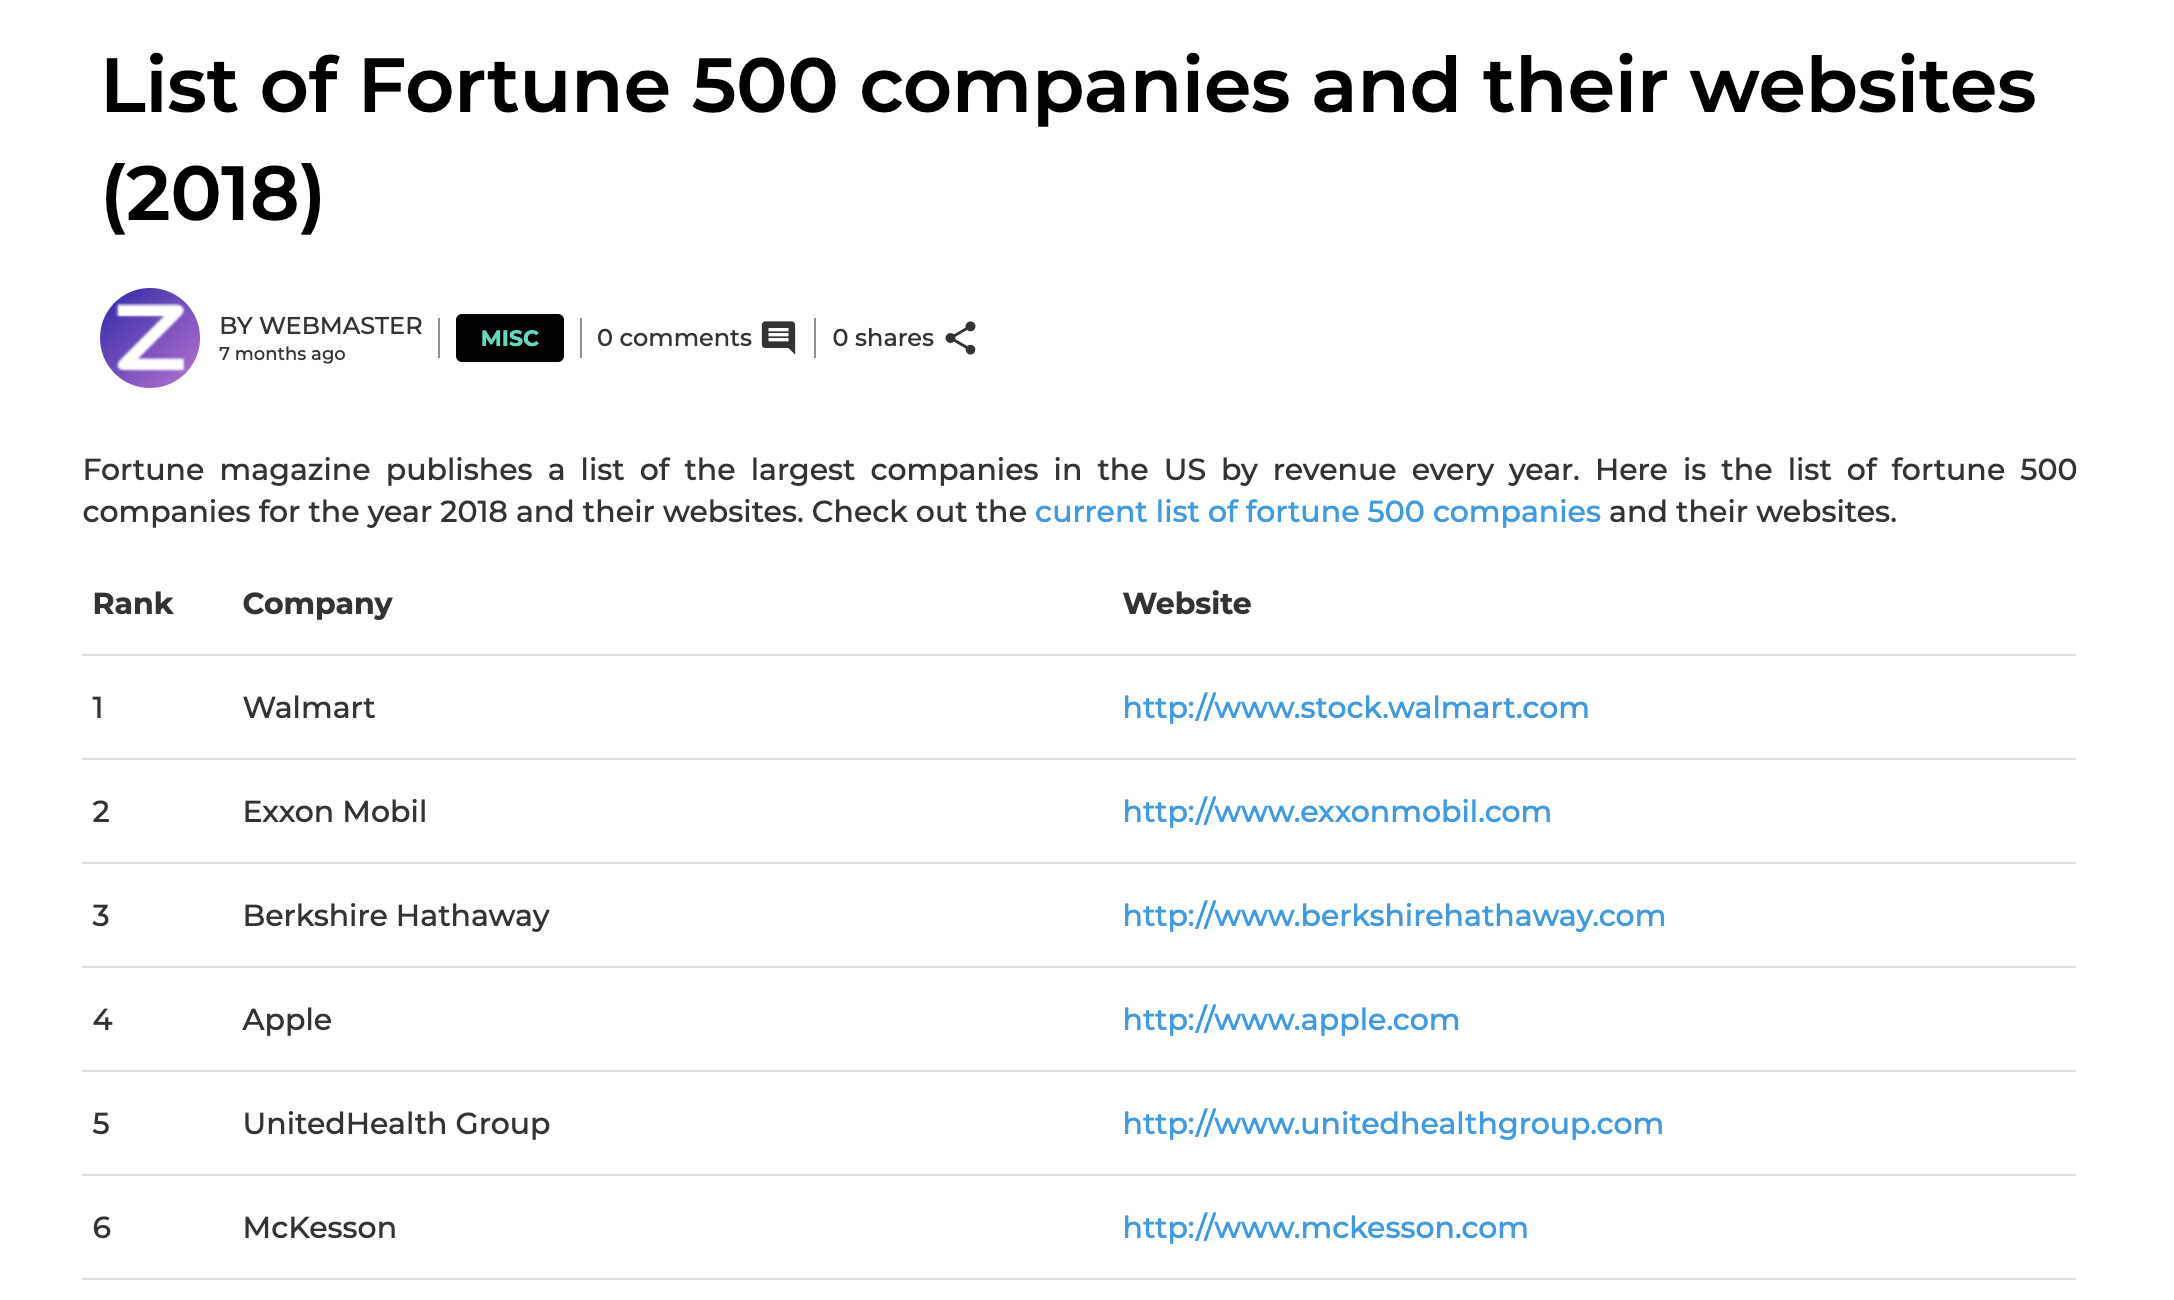

It can be seen on this website that the list contains the rank, company name and the website of the company. The whole content of this website can be received as a response when requested with the request library in Python

In [8]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

web_url = 'https://www.zyxware.com/articles/5914/list-of-fortune-500-companies-and-their-websites-2018'
response = requests.get(web_url)

print('Status code\n', response.status_code)
print('\n--\n')
print('Content of the website\n', response.content[:5000])

Status code
 200

--

Content of the website
 b'<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">\n  <head>\n    <meta charset="utf-8" />\n<script>dataLayer = [];dataLayer.push({"tag": "5914"});</script>\n<script>window.dataLayer = window.dataLayer || []; window.dataLayer.push({"drupalLanguage":"en","drupalCountry":"IN","siteName":"Zyxware Technologies","entityCreated":"1562300185","entityLangcode":"en","entityStatus":"1","entityUid":"1","entityUuid":"6fdfb477-ce5d-4081-9010-3afd9260cdf7","entityVid":"15541","entityName":"webmaster","entityType":"node","entityBundle":"story","entityId":"5914","entityTitle":"List of Fortune 50

## Using bs4 (and lxml) to parse the structure and access different elements within a HTML or XML

bs4 is a Python library which parses through HTML content and understands the complete structure of the content. The response content can be passed to a BeautifulSoup method to obtain a soup object which looks very structured.

In [11]:
soup_object = BeautifulSoup(response.content)

# Uncomment the below line and look into the contents of soup_object
soup_object

## Manipulate it into a tabular structure - explore the schema

To be able to accurately extract relevant data from the webpage, it is important to explore the schema and understand the structure of the webpage. A good way to do this is to inspect the webpage directly on a web browser.
<br>

To do this,
- Open the webpage on a browser
- Right click on the data content to be extracted
- Click on 'Inspect' or 'Inspect element' option

This will open a console window which shows the real time HTML code corresponding to the web content. Now identify the type of HTML tag which contains all the data along with any id names or class names associated to that HTML tag. In our case, the data is enclosed in the 'table' HTML tag with the class name 'data-table'. This information can be used to search for the web content directly in our soup object with the find_all() method. This will return a soup object.

In [18]:
data_table = soup_object.find_all('table', 'data-table')[0]

# Uncomment the below line and look into the contents of data_table
# data_table

It can be seen that relevant block of data has been extracted but further extracted needs to be done to individually extract the rank, company name and the company website data. On further analysis, it can be seen that every row of data is enclosed under a 'tr' HTML tag which means 'table row'. All these row values can be extracted into a list of values by finding the 'tr' values from our newly created soup object 'data_table'

In [19]:
all_values = data_table.find_all('tr')
all_values[:10] # Prints the first 10 captured tag elements

[<tr><th>Rank</th>
 <th>Company</th>
 <th>Website</th>
 </tr>, <tr><td>1</td>
 <td>Walmart</td>
 <td><a href="http://www.stock.walmart.com">http://www.stock.walmart.com</a></td>
 </tr>, <tr><td>2</td>
 <td>Exxon Mobil</td>
 <td><a href="http://www.exxonmobil.com">http://www.exxonmobil.com</a></td>
 </tr>, <tr><td>3</td>
 <td>Berkshire Hathaway</td>
 <td><a href="http://www.berkshirehathaway.com">http://www.berkshirehathaway.com</a></td>
 </tr>, <tr><td>4</td>
 <td>Apple</td>
 <td><a href="http://www.apple.com">http://www.apple.com</a></td>
 </tr>, <tr><td>5</td>
 <td>UnitedHealth Group</td>
 <td><a href="http://www.unitedhealthgroup.com">http://www.unitedhealthgroup.com</a></td>
 </tr>, <tr><td>6</td>
 <td>McKesson</td>
 <td><a href="http://www.mckesson.com">http://www.mckesson.com</a></td>
 </tr>, <tr><td>7</td>
 <td>CVS Health</td>
 <td><a href="http://www.cvshealth.com">http://www.cvshealth.com</a></td>
 </tr>, <tr><td>8</td>
 <td>Amazon.com</td>
 <td><a href="http://www.amazon.com"

In [20]:
print(all_values[0])
print('--')
print(all_values[1])
print('--')
print(all_values[2])

<tr><th>Rank</th>
<th>Company</th>
<th>Website</th>
</tr>
--
<tr><td>1</td>
<td>Walmart</td>
<td><a href="http://www.stock.walmart.com">http://www.stock.walmart.com</a></td>
</tr>
--
<tr><td>2</td>
<td>Exxon Mobil</td>
<td><a href="http://www.exxonmobil.com">http://www.exxonmobil.com</a></td>
</tr>


The first element of the list contains the column names 'Rank, Company and Website'. The next elements of the list contain soup objects which contain the company data including the rank. This data can be extracted in a loop since the structure for all the list elements is the same.

- An empty dataframe fortune_500_df is created with the column names 'rank', 'company_name' and 'company_website'
- The index is initiated to zero
- A for loop is designed to go through all the elements of the list in order and extract the rank, company name and company website from the list element which are enclosed in the 'td' HTML tag. A find_all() will return a list of td tags.
- The '.text' attribute can be used to just pick the text part from the tag. In our case this is the rank, company name and the compnay website
- These values are then put into the dataframe and the index value is incremented

In [21]:
fortune_500_df = pd.DataFrame(columns = ['rank', 'company_name', 'company_website'])
ix = 0

for row in all_values[1:]:
    values = row.find_all('td')
    rank = values[0].text
    company = values[1].text
    website = values[2].text
    
    fortune_500_df.loc[ix] = [rank, company, website]
    ix += 1
    
fortune_500_df.head()

,rank,company_name,company_website
0,1,Walmart,http://www.stock.walmart.com
1,2,Exxon Mobil,http://www.exxonmobil.com
2,3,Berkshire Hathaway,http://www.berkshirehathaway.com
3,4,Apple,http://www.apple.com
4,5,UnitedHealth Group,http://www.unitedhealthgroup.com


## Store it in the appropriate format - CSV, TSV and export the results

The dataframe can now be stored as a csv file. Pandas has a 'to_csv' method which can be used to save the data into the file '

In [ ]:
fortune_500_df.to_csv('./fortune_500_companies.csv', index=False)